# Cubic splines and Runge's phenomenon

In this notebook we will study cubic spline interpolation and see why it is able to alleviate [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge's_phenomenon). 

For more details, see Chapter 17 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Section 3.1 of

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## The built-in function `CubicSpline`

Given nodes $a = x_0 < x_1 < \ldots < x_n = b$ and data $y_0, \ldots, y_n$, recall that a *cubic spline interpolant* $S$ is a piecewise cubic polynomial over each interval $[x_i, x_{i+1}]$ that interpolates the data and that is twice continuously differentiable over $[a,b]$. The spline is called *natural* if $S''(a) = S''(b) = 0$ and *clamped* if $S'(a) = S'(b) = 0$. (A more general way to define a clamped spline is to let that $S'(a) = f'(a)$ and $S'(b) = f'(b)$, where $f$ is such that $y_i = f(x_i)$ -- here we are assuming that $f'(a) = f'(b) = 0$). 


An easy way to construct a cubic spline interpolant in Python is by using the `CubicSpline` function from the `scipy.interpolate` module. These boundary conditions are implemented by assigning the values `natural` or `clamped` to the parameter `bc_type`. For simplicity, we use equispaced nodes and random $y$-values. 

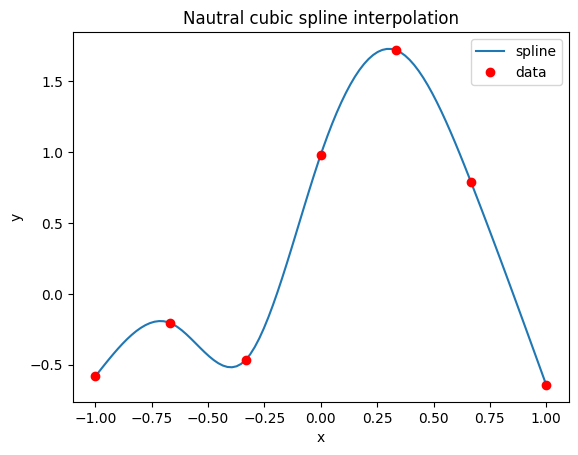

In [2]:
from scipy.interpolate import CubicSpline 

n = 6 # number of subintervals (polynomial pieces of the spline)

x_data = np.linspace(-1,1,n+1) # create nodes x0, ..., xn
y_data = np.random.randn(n+1)  # generate random y-values

spline_natural = CubicSpline(x_data, y_data, bc_type='natural') # compute natural cubic spline

# Visualize results
x_grid = np.linspace(-1, 1, 100)

plt.plot(x_grid, spline_natural(x_grid), label = 'spline')
plt.plot(x_data, y_data, 'or', label = 'data')
plt.title('Nautral cubic spline interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Natural vs. clampled spline

Let's visually compare nautral and clamped splines.

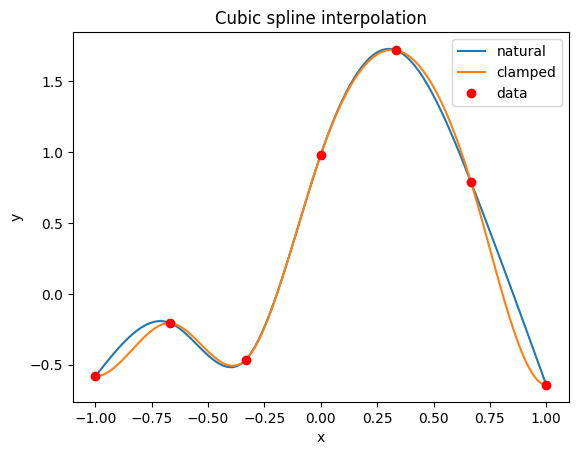

In [3]:
spline_clamped = CubicSpline(x_data, y_data, bc_type='clamped')

plt.plot(x_grid, spline_natural(x_grid), label='natural')
plt.plot(x_grid, spline_clamped(x_grid), label='clamped')
plt.plot(x_data, y_data, 'or', label = 'data')
plt.title('Cubic spline interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Runge's phenomenon and polynomial vs. spline interpolation

One of the benefits of spline is their ability to lessen [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge's_phenomenon) ubiquitous in polynomial interpolation when the number of nodes (and, hence, the polynomial degree) gets larger. Runge's phenomonen consists in severe oscillations of the interpolant close to the interval's endpoints when equispaced nodes are employed. Here we illustrate this phenomenon considering the function 
$$
f(x) = \frac{1}{1 + 25 x^2},
$$
over the interal $[-1,1]$.

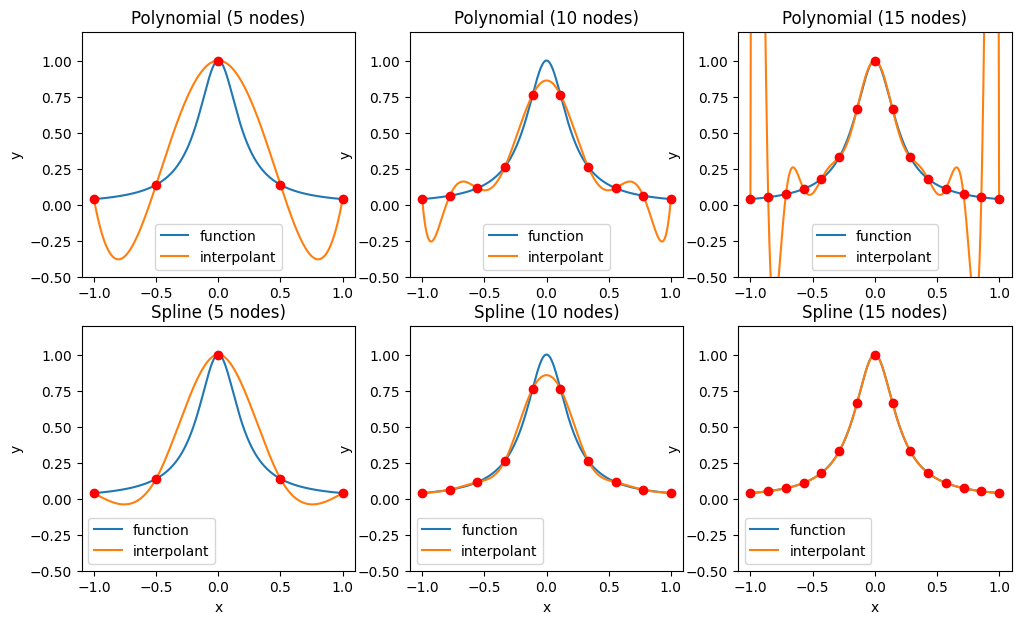

In [4]:
from scipy.interpolate import lagrange 

plt.figure(figsize = (12, 7) ) # set initial figure dimensions

f = lambda x: 1 / (1 + 25 * x**2) # define target function (ground truth)
x_grid = np.linspace(-1, 1, 1000) # fine grid for visualization

n_values = np.array((4,9,14)) # values of n to run in multiple experiments

i_n = 0
for n in n_values:
    i_n += 1 # increase counter
    
    x_data_2 = np.linspace(-1,1,n+1) # create equispaced nodes x0, ..., xn
    y_data_2 = f(x_data_2)  # generate random y-data

    # compute cubic spline and polynomial interpolant
    spline_natural_2 = CubicSpline(x_data_2, y_data_2, bc_type='natural')
    interp_poly_2 = lagrange(x_data_2, y_data_2)
    
    # visualize polynomial interpolant 
    plt.subplot(2, 3, i_n)
    plt.plot(x_grid, f(x_grid), label = 'function')
    plt.plot(x_grid, interp_poly_2(x_grid), label='interpolant') 
    plt.plot(x_data_2, y_data_2, 'or')
    plt.title('Polynomial ('+str(n+1)+' nodes)')
    plt.ylabel('y')
    plt.ylim((-0.5, 1.2))
    plt.legend()

    # visualize spline interpolant 
    plt.subplot(2, 3, i_n+3)
    plt.plot(x_grid, f(x_grid), label = 'function')
    plt.plot(x_grid, spline_natural_2(x_grid), label='interpolant')    
    plt.plot(x_data_2, y_data_2, 'or')
    plt.title('Spline ('+str(n+1)+' nodes)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim((-0.5, 1.2))
    plt.legend()

plt.show()


# Recommended problems

1. Similarly to what we did in [Notebook 7 "Three ways to perform polynomial interpolation"](https://github.com/simone-brugiapaglia/numerical-analysis-notebooks/blob/main/07_interpolation.ipynb), an alternative way to define a cubic spline is to (1) explicitly enforce the linear conditions defining a (natural or clamped) cubic spline and (2) solve the corresponding linear system. Try to check that you get the same answer using this method and the `CubicSpline` built-in function.

3. Read the `CubicSpline` documentation and exepriment with boundary conditions of type `not-a-knot` and `periodic`.